# Fitting a logistic regression model and Neural network model and evaluating the performance.

In this notebook, I will import data that was generated from WE04a-NN-data-gen. I will  fit a logistic regression model to the data, and evaluate the resulting performance of this model (use the confusion matrix and associated metrics). Add a section at the end of the notebook and discuss how well the model performed on the test data.

### Importing necessary libraries and set 1 as random seed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
import collections

np.random.seed(1)

### Load data from CSV file into dataframe

In [2]:
data = pd.read_csv('we04a_dataset.csv')

## Conducting an initial exploration of the data

Things are simple with this dataset. There is one input variable and one target variable. The input variable is continuous and the target is boolean. We can see that there are no missing values in the dataset.

The following code will:
* display the first 5 rows of the dataframe
* check the dimensions of the dataframe
* check the data types of the columns
* check for missing values
* develop scatterplot of the data
* provide a statistical summary of the data


In [3]:
data.head(5)

,input,target
0,48.257531,0
1,74.505000,1
2,10.824637,0
3,37.990401,0
4,21.743977,0


In [4]:
data.shape

(1000, 2)

In [5]:
data.dtypes

input     float64
target      int64
dtype: object

In [6]:
data.isnull().sum()

input     0
target    0
dtype: int64

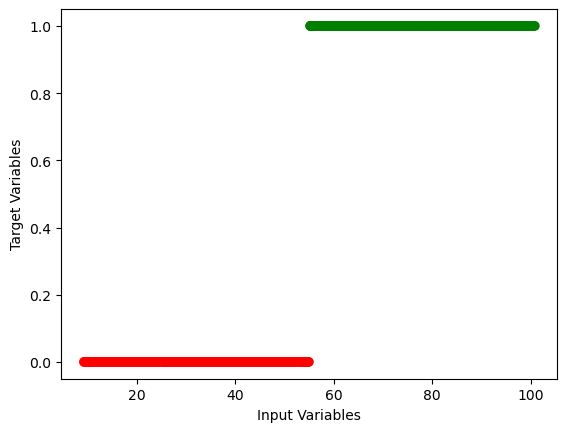

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
colors = np.array(["red", "green"])
ax.scatter(data['input'], data['target'], c=colors[np.ravel(data['target'].astype(int))])
ax.set_xlabel('Input Variables')
ax.set_ylabel('Target Variables')
plt.show()

In [8]:
data.describe()

,input,target
count,1000.000000,1000.000000
mean,55.101735,0.508000
std,25.988103,0.500186
min,9.297066,0.000000
25%,32.705059,0.000000
50%,55.778229,1.000000
75%,77.739883,1.000000
max,100.852092,1.000000


### Create a logistic model that best fits the data
To avoid overfitting, I used a cross validation approach. This involves randoming splitting the data into a training and test dataset.I used 80/20 here.

In [9]:
X=data[['input']]
y=data[['target']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
trainData = X_train.copy()
trainData['target'] = y_train


In [12]:
trainData.head(5)

,input,target
382,97.763453,1
994,60.793732,1
982,90.153127,1
47,38.718991,0
521,63.016154,1


In [13]:
testData = X_test.copy()
testData['target'] = y_test

In [14]:
testData.head(5)

,input,target
507,26.196076,0
818,71.969418,1
452,90.499055,1
368,56.341045,1
242,59.826121,1


### Saving the test data to csv files

### Fitting a logistic regression model

In [15]:
log_reg = LogisticRegression().fit(X_train, np.ravel(y_train))

### Adding a column to the dataframe with the predicted values

In [16]:
data['predicted'] = log_reg.predict(X)
data.head(5)

,input,target,predicted
0,48.257531,0,0
1,74.505000,1,1
2,10.824637,0,0
3,37.990401,0,0
4,21.743977,0,0


### Adding a column of the probabilities of being a 1

In [17]:
data['pred_prob'] = log_reg.predict_proba(X)[:,1]
data.head(5)

,input,target,predicted,pred_prob
0,48.257531,0,0,5.863507e-08
1,74.505000,1,1,1.000000e+00
2,10.824637,0,0,3.540109e-48
3,37.990401,0,0,5.455237e-19
4,21.743977,0,0,1.910367e-36


### Giving a condition and adding a column to the data frame if the predicted value is coorect

In [18]:
data['correct_prediction'] = data['target'] == data['predicted']
data.head(5)

,input,target,predicted,pred_prob,correct_prediction
0,48.257531,0,0,5.863507e-08,True
1,74.505000,1,1,1.000000e+00,True
2,10.824637,0,0,3.540109e-48,True
3,37.990401,0,0,5.455237e-19,True
4,21.743977,0,0,1.910367e-36,True


### Displaying the probabilities and the predicted values

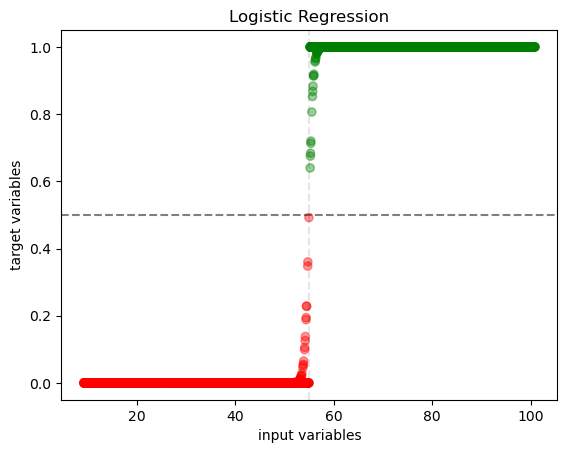

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
colors = np.array(["red", "green"])
ax.scatter(X, y, c=colors[np.ravel(y.astype(int))])
ax.scatter(X, data['pred_prob'], c=colors[np.ravel(y.astype(int))], alpha=0.4)
plt.axhline(.5, color="black", label="cutoff", linestyle='--', alpha=.5)
plt.axvline(55, color="black", label="cutoff", linestyle='--', alpha=.1)
ax.set_xlabel('input variables')
ax.set_ylabel('target variables')
ax.set_title('Logistic Regression')
plt.show()

In the above graph 0 being false and 1 being true.

### Identify the coefficients and intercept.

In [20]:
log_reg.coef_
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
r2 = log_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}")

Y = -136.04 + 2.47x
R^2: 1.000


### Percentage of times this model correctly predict the outcome

In [21]:
print(((data['correct_prediction'].sum() / data.shape[0])*100) , '%')

100.0 %


## Interpretation of the logistic regression model

The b1 coefficient is the change in the log odds of being a 1 for a 1 unit increase in the predictor variable. 

The log odds function is the natural log of the odds. It's also known as the logit function.

> $\log \left(\frac{p}{1-p}\right)=\operatorname{logit}(p)$

Based on the results from our logistic regression above, we can see that the coefficient for `input` is 2.43. This means that for a 1 unit increase in input, the log odds of being a true increases by 2.43.


$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=-132.89 + 2.43x$

To find the probability of being a 1 we can use the inverse logit function (aka, logistic function).

### Derive the predicted probability from the logistic model


The logit function is defined as

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)$

The logistic function, is defined as 

$\operatorname{logistic}(p)=\frac{1}{e^{\beta_0+\beta_1x}}$


When we use logistic regression (just as in regular regression), we are trying to find the best values for $\beta_0$ and $\beta_1$ that minimize the error between the predicted values and the actual values. But the interpretation of the coefficients is different.

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=\beta_0+\beta_1x$

### For illustration, take this relationship and derive the function for the probability of being a 1.

Exponentiate and take the multiplicative inverse of both sides, and we get the odds ratio.

$\frac{1-p}{p}=\frac{1}{e^{\beta_0+\beta_1x}}$

Partial out the fraction on the left-hand side of the equation and add one to both sides,

$\frac{1}{p}=1+\frac{1}{e^{\beta_0+\beta_1x}}$

Change 1 to a common denominator

$\frac{1}{p}=\frac{e^{\beta_0+\beta_1 x}+1}{e^{\beta_0+\beta_1 x}}$

Finally, take the multiplicative inverse again to obtain the formula for the probability P(target=1)

$p=\frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}$


In [22]:
p_y_eq_1 = np.exp(b0 + b1 * X) / (1+ np.exp(b0 + b1 * X))
p_y_eq_1

,input
0,5.863507e-08
1,1.000000e+00
2,3.540109e-48
3,5.455237e-19
4,1.910367e-36
...,...
995,1.000000e+00
996,3.733442e-19
997,1.000000e+00
998,3.198609e-15


In [23]:
data.pred_prob

0      5.863507e-08
1      1.000000e+00
2      3.540109e-48
3      5.455237e-19
4      1.910367e-36
           ...     
995    1.000000e+00
996    3.733442e-19
997    1.000000e+00
998    3.198609e-15
999    1.000000e+00
Name: pred_prob, Length: 1000, dtype: float64

## Performance analysis of classification models

I will try to analyze the performance of the classification models that I have trained above. I am using the following metrics:
* Accuracy
* Precision
* Recall
* F1 score

### Loading and displaying the trained model and test data.

In [24]:
testData.head(5)

,input,target
507,26.196076,0
818,71.969418,1
452,90.499055,1
368,56.341045,1
242,59.826121,1


In [25]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       103
           1     1.0000    1.0000    1.0000        97

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200



### Creating and displaying the confusion matrix

In [26]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[103,   0],
       [  0,  97]], dtype=int64)

### Deriving Accuracy, Precision, Recall, F1 score

In [27]:
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]

In [29]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})
rmses = pd.DataFrame({"model": [], "rmse": []})

In [30]:
performance = pd.concat([performance, pd.DataFrame({'model':"logistic Regression", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,logistic Regression,1.0,1.0,1.0,1.0


[('target', 1)]


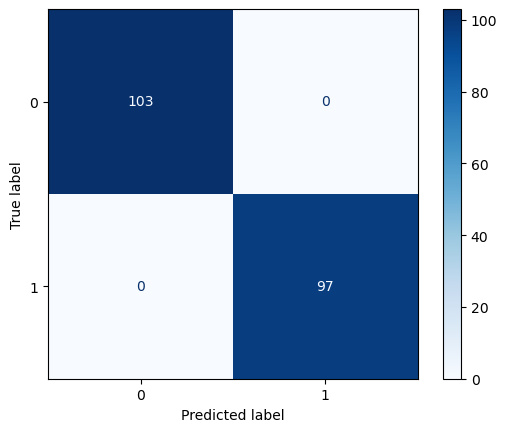

In [31]:
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Performance metric rmse

In [32]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression', "rmse": [test_rmse]})])

Logestic regression Test RMSE: 0.0


## Prediction using neural network model (MLPClassifier)

### Neural Network

In [33]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=200)
_ = ann.fit(X_train, np.ravel(y_train))

CPU times: total: 27 s
Wall time: 25.5 s


In [34]:
%%time
y_pred = ann.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9709    0.9852       103
           1     0.9700    1.0000    0.9848        97

    accuracy                         0.9850       200
   macro avg     0.9850    0.9854    0.9850       200
weighted avg     0.9855    0.9850    0.9850       200

CPU times: total: 0 ns
Wall time: 24 ms


In [35]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[100,   3],
       [  0,  97]], dtype=int64)

In [36]:
## Interpretting Confusion Matrix

TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]

In [38]:
performance = pd.concat([performance, pd.DataFrame({'model':"Neural Networks", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance



,model,Accuracy,Precision,Recall,F1
0,logistic Regression,1.000,1.00,1.0,1.000000
0,Neural Networks,0.985,0.97,1.0,0.984772


[('target', 1)]


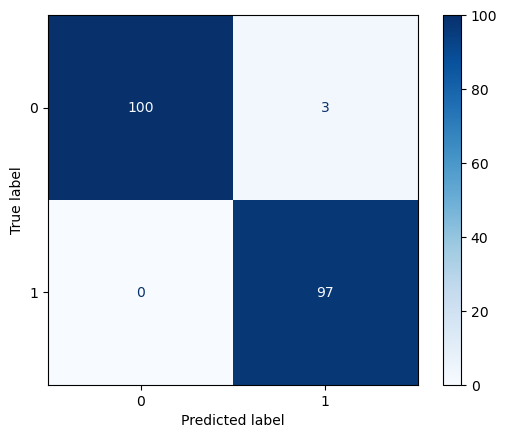

In [39]:
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [40]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks', "rmse": [test_rmse]})])

Neural Network Test RMSE: 0.1224744871391589


### MLPClassifier using random search

In [41]:
%%time

score_measure = "accuracy"
kfolds = 4

param_grid = {
    'hidden_layer_sizes': [ (32,), (64,), (128,), (32,16), (64,32)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.1, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [9000]
}


ann = MLPClassifier(random_state=1)
rand_search = RandomizedSearchCV(
    estimator = ann,                    # the model to use
    param_distributions=param_grid,     # the parameter grid
    cv=kfolds,                      # number of folds
    n_iter=200,                     # number of iterations; this is the number of parameter settings that are sampled
    scoring=score_measure,          # score measure used to evaluate parameter combinations
    verbose=0,                      # verbose level; the higher, the more messages. 0 for no messages
    n_jobs=-1,                      # number of parallel jobs to run >> n_jobs=-1 will utilize all available CPUs 
    random_state=1                  # random state ensures that the splits are the same for each iteration
)

rand_search.fit(X_train, np.ravel(y_train))

bestMLPClassifier = rand_search.best_estimator_

print(rand_search.best_params_)

{'solver': 'adam', 'max_iter': 9000, 'learning_rate_init': 0.0001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (64, 32), 'alpha': 0.2, 'activation': 'relu'}
CPU times: total: 13.8 s
Wall time: 8min 37s


In [42]:
%%time
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9806    0.9902       103
           1     0.9798    1.0000    0.9898        97

    accuracy                         0.9900       200
   macro avg     0.9899    0.9903    0.9900       200
weighted avg     0.9902    0.9900    0.9900       200

CPU times: total: 15.6 ms
Wall time: 15.5 ms


### Deriving performance metrics

In [43]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[101,   2],
       [  0,  97]], dtype=int64)

In [44]:
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]

In [45]:
performance = pd.concat([performance, pd.DataFrame({'model':"Neural Networks Random Search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance



,model,Accuracy,Precision,Recall,F1
0,logistic Regression,1.000,1.000000,1.0,1.000000
0,Neural Networks,0.985,0.970000,1.0,0.984772
0,Neural Networks Random Search,0.990,0.979798,1.0,0.989796


[('target', 1)]


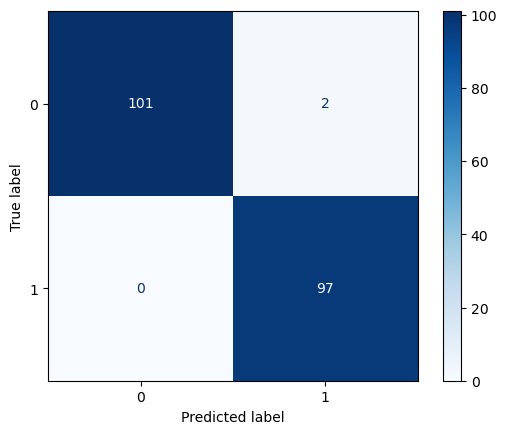

In [46]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Two false positives are present in the prediction

In [47]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks Random Search', "rmse": [test_rmse]})])

Neural Network Test RMSE: 0.1


### MLPClassifier using exhaustive grid search on random search

In [48]:
%%time

score_measure = "accuracy"
kfolds = 4

activation = rand_search.best_params_['activation']
solver = rand_search.best_params_['solver']
alpha = rand_search.best_params_['alpha']
learning_rate = rand_search.best_params_['learning_rate']
learning_rate_init = rand_search.best_params_['learning_rate_init']
max_iter = rand_search.best_params_['max_iter']

param_grid = {
    'hidden_layer_sizes': [ (127,63), (126,62), (125,61), (124,60), (129,65)],
    'activation': [activation],
    'solver': [solver],
    'alpha': [alpha-0.1, alpha, alpha+0.1, alpha+0.2, alpha+0.3, alpha+0.4, alpha+0.5, alpha+0.6, alpha+0.7, alpha+0.8, alpha+0.9],
    'learning_rate': [learning_rate],
    'learning_rate_init': [learning_rate_init-0.00009, learning_rate_init, learning_rate_init+0.0005],
    'max_iter': [5000]
}

ann = MLPClassifier(random_state=0)
grid_search = GridSearchCV(
    estimator = ann,        # the model that will be evaluated
    param_grid=param_grid,  # the dictionary of hyperparameters
    cv=kfolds,              # number of folds to use for k-fold cross validation
    scoring=score_measure,  # the scoring metric to optimize for
    verbose=0,              # controls the amount of diagnostic information displayed, 0 means none
    n_jobs=-1,              # Number of similtaneous threads to run to accomplish this n_jobs=-1 will utilize all available CPUs 
)
grid_search.fit(X_train, np.ravel(y_train))

bestMLPClassifier = grid_search.best_estimator_

print(grid_search.best_params_)

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (129, 65), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0001, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 3min 50s
Wall time: 27min 11s


In [49]:
%%time
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9903    0.9951       103
           1     0.9898    1.0000    0.9949        97

    accuracy                         0.9950       200
   macro avg     0.9949    0.9951    0.9950       200
weighted avg     0.9951    0.9950    0.9950       200

CPU times: total: 46.9 ms
Wall time: 32 ms


### Deriving performance metrics

In [50]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[102,   1],
       [  0,  97]], dtype=int64)

In [51]:
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]

In [52]:
performance = pd.concat([performance, pd.DataFrame({'model':"Neural Networks grid Search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance


,model,Accuracy,Precision,Recall,F1
0,logistic Regression,1.000,1.000000,1.0,1.000000
0,Neural Networks,0.985,0.970000,1.0,0.984772
0,Neural Networks Random Search,0.990,0.979798,1.0,0.989796
0,Neural Networks grid Search,0.995,0.989796,1.0,0.994872


[('target', 1)]


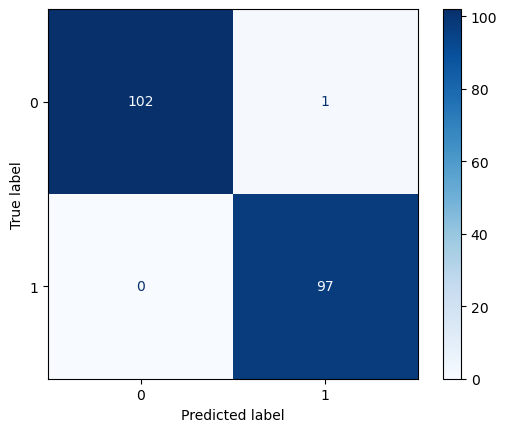

In [53]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Three false positives are present in the prediction

In [54]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks Grid search', "rmse": [test_rmse]})])

Neural Network Test RMSE: 0.07071067811865475


In [55]:
rmses

,model,rmse
0,Logestic Regression,0.000000
0,Neural Networks,0.122474
0,Neural Networks Random Search,0.100000
0,Neural Networks Grid search,0.070711


In [57]:
performance

,model,Accuracy,Precision,Recall,F1
0,logistic Regression,1.000,1.000000,1.0,1.000000
0,Neural Networks,0.985,0.970000,1.0,0.984772
0,Neural Networks Random Search,0.990,0.979798,1.0,0.989796
0,Neural Networks grid Search,0.995,0.989796,1.0,0.994872


## Conclusion

Based on the results we got from each model

* Logistic Regression: The logistic regression model displayed an impressive performance with 100% accuracy, precision, recall, and f1-score. The confusion matrix showed perfect classification, with no false positives or false negatives. The RMSE of the logistic regression model was 0.0, meaning there was no error between the observed and predicted values.

* Neural Network (MLPClassifier): The performance of the MLPClassifier was slightly lower compared to the logistic regression. While it achieved 98% accuracy and precision, it made 3 errors (false positives), which can be seen in the confusion matrix. The model had an RMSE of 0.122, which indicates a small but present error in the model's predictions.

* Neural Network (MLPClassifier) with Random Search: Using random search improved the performance of the MLPClassifier. It reduced the number of false positives to 2 and achieved a 99% score for all performance metrics. However, there were still minor errors, as indicated by an RMSE of 0.1.

* Neural Network (MLPClassifier) with Exhaustive Grid Search on Random Search: The application of exhaustive grid search on random search further improved the MLPClassifier's performance. This model only made a single error (one false positive), resulting in 99.5% accuracy, precision, recall, and f1-score. The RMSE also decreased to 0.071, indicating the smallest prediction error among all neural network models.

#### Note: I am using rmse to support our conclusions but not as a main score metric since the target variable is classification type.

In conclusion, the Logistic Regression model achieved the best performance among all tested models. It showed perfect accuracy, precision, recall, and f1-score, and had no prediction error (RMSE = 0.0). The neural network models also performed commendably, particularly when hyperparameters were optimized using random search and exhaustive grid search. The slight errors in their performance underline the importance of fine-tuning model parameters to achieve the best predictive results.

##### Logestic regression predicted the target perfectly because the target variable is binary. Logistic regression is especially well-suited for binary classification problems. When the decision boundary is linear and the classes are separable, logistic regression can yield excellent results. The quaility of data in my case is meaningful and extremely good.

Sice I conducted predictions on synthetic data I can not exactly discuss cost of having FP and FN. It is always good to have FN, FPs as less as possible.

If the problem at hand involves a high cost of misclassification, the logistic regression model should be chosen due to its perfect predictive performance. However, if computational cost and time are considerations, then a single run of the MLP Classifier might be more suitable. Its performance was only slightly inferior to the logistic regression model but is typically gives better results. The trade-off between accuracy and computational resources should be considered based on the specific requirements.